In [1]:
import backtesting_framework as bf
import momentum_strategy
import pandas as pd
import datetime

### 讀取資料

In [2]:
datas_table = pd.read_csv('(2010-2021)stock_price.csv', index_col=0, header=[0,1], parse_dates=True)
# datas_table.head(2)

### 回測

In [3]:
# 參數設定
formation_period=20  # 用20個交易日計算動能
stocks_number=2      # 每次rebalance買進兩支股票
reserve_ratio=0.05   # 每次rebalance保留5%現金
strategy_execute_start_date = datetime.datetime(2019,12,31) # 策略執行日


#回測

# 初始化回測物件
cerebro = bf.cerebro.Cerebro()
# 傳入回測資料
cerebro.datas_table = datas_table
# 加入策略類別，並且設定策略內生變數
cerebro.addstrategy(
    momentum_strategy.Strategy,
    formation_period=formation_period,
    stocks_number=stocks_number,
    reserve_ratio=reserve_ratio
)
# 設定是否輸出提示訊息
cerebro.notify_orNot = True
# 是否在策略最後一天賣掉所有股票
cerebro.close_at_BacktestingEndDate_orNot = True
# 初始資金
cerebro.cash = 100000

# 回測所有資料起始日(計算)
cerebro.start_date = datetime.datetime(2019,12,1)
# 執行策略時間點
cerebro.strategy_execute_start_date = strategy_execute_start_date
# 資料結束日、回測結束日
cerebro.end_date = datetime.datetime(2021,12,31)

# 執行
cerebro.run()

AMD US Equity - rank:1 - momentum_value:0.18409501678285567
AAPL US Equity - rank:2 - momentum_value:0.11163688673531169
---after_next---
pending_open_orders=['AMD US Equity', 'AAPL US Equity']
pending_close_orders=[]
holded_orders=[]



2020-01-02 00:00:00 success(open) -- magic number=1 ,  AAPL US Equity , size=647 , value=47921.6725 , executed_price=74.0675
2020-01-02 00:00:00 success(open) -- magic number=2 ,  AMD US Equity , size=1035 , value=48541.5 , executed_price=46.9
NFLX US Equity - rank:1 - momentum_value:0.046329704981656006
GE US Equity - rank:2 - momentum_value:0.043587594300083854
---after_next---
pending_open_orders=['NFLX US Equity', 'GE US Equity']
pending_close_orders=['AAPL US Equity', 'AMD US Equity']
holded_orders=['AAPL US Equity', 'AMD US Equity']



2020-02-03 00:00:00 success(close) -- magic number=1 , AAPL US Equity , size=647, value=49189.7925 , close_price=76.0275
2020-02-03 00:00:00 success(close) -- magic number=2 , AMD US Equity , size=1035, value=48024

In [5]:
print('策略年化報酬 = ',cerebro.analysis_obj.calculate_annualized_return())
print('策略年化波動度 = ',cerebro.analysis_obj.calculate_annualized_volatility())
print('策略年化夏普比例 = ',cerebro.analysis_obj.calculate_annualized_sharpe_ratio())

策略年化報酬 =  0.6537422086746815
策略年化波動度 =  0.37747559190955016
策略年化夏普比例 =  1.7318794186600803


<AxesSubplot:>

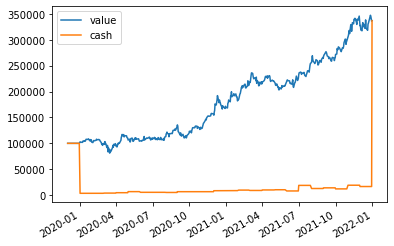

In [4]:
cerebro.analysis_obj.account_timeseries_state.plot()